# Lecture 14: Probability and Simulation


**Helpful Resource:**
- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 

* [Tabular Thinking Guide](https://drive.google.com/file/d/13HaWu4rrjeowEOs6S_vaQGM3GremzXQ3/view?usp=sharing)
* [Applying Functions](https://www.inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html)
* [Conditionals](https://www.inferentialthinking.com/chapters/09/1/Conditional_Statements.html)
* [Iteration](https://www.inferentialthinking.com/chapters/09/2/Iteration.html)

In [2]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore")

### Simulate Dice

Use `np.random.choice` to simulate the rolling of two dices by defining a function that rolls the two dices $n$ times. 

In [14]:
L = np.arange(1, 7)
sum(np.random.choice(L, 2))

11

In [18]:
L = np.arange(1, 7)
def roll2dice(n):
    outcomes = make_array()
    for i in np.arange(n):
        sum_twodice = sum(np.random.choice(L, 2))
        outcomes = np.append(outcomes, sum_twodice)
    return(outcomes)

roll2dice(100)

array([  6.,   6.,   6.,  10.,   4.,   8.,   6.,   6.,   6.,   7.,   9.,
         6.,   9.,  11.,   5.,  12.,   9.,   6.,   6.,   6.,   4.,   7.,
         9.,   9.,   2.,   7.,  10.,  10.,   9.,   5.,   9.,   7.,   8.,
         5.,   2.,   7.,   3.,   7.,   6.,   4.,   7.,  10.,  10.,   5.,
         7.,   7.,   5.,   8.,   4.,   5.,  11.,   8.,   9.,   9.,   5.,
         5.,   7.,   9.,   9.,   7.,   6.,   5.,   7.,  10.,   5.,   2.,
         5.,  11.,   8.,   9.,   4.,   6.,   8.,   5.,   5.,   7.,   7.,
         6.,   5.,   6.,   4.,   6.,   5.,   6.,   7.,   7.,   3.,   4.,
         5.,   5.,  11.,  10.,   9.,  11.,   6.,   2.,   6.,   4.,   8.,
         7.])

Use your code to perform 1000 rolls of dice, and graph the histogram of the sum of two dice. You may want to use the  `Table().with_column` function to create the table first, then use the `hist` functions to create the histogram. 

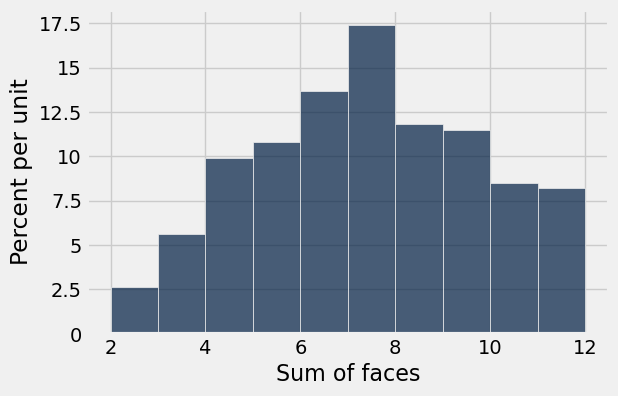

In [28]:
thousand_rolls = roll2dice(1000)
t = Table().with_column('Sum of faces', thousand_rolls)
#t.hist('Sum of faces')
xrange = np.arange(2, 13, 1)

t.hist('Sum of faces', bins=xrange)


In [32]:
(1/36)
np.count_nonzero(thousand_rolls == 2) / 1000

0.026

Compute the proportion of the outcomes that are greater than 10. 

In [33]:
np.count_nonzero(thousand_rolls > 10) / 1000

0.082

If you continue to the roll the dice indefinitely, eventually how many percent of your outcomes will be greater than $10$? (you don't need to write any program for this question. Instead, calculate the probability based on the possible outcomes of rolling 2 dice)

In [34]:
3/36

0.08333333333333333

### Rolling 3 dice

Now consider the rolling of 3 fair dice. Calculate each probability first, then verify your probability calculation with a simulation using `np.random.choice`  

What is the chance that you get a sum of 16?

In [38]:
L = np.arange(1, 7)
def roll3dice(n):
    outcomes = make_array()
    for i in np.arange(n):
        sum_twodice = sum(np.random.choice(L, 3))
        outcomes = np.append(outcomes, sum_twodice)
    return(outcomes)
np.count_nonzero(roll3dice(10000)==15) / 10000,  10/216

(0.0473, 0.046296296296296294)

What is the chance of having no even numbers among the three dice? 

1/8

What is the chance of having at least one 6 among the three dice? 

In [40]:
1-(5/6)**3, 3*(1/6)*(5/6)**2+3*(5/6)*(1/6)**2+(1/6)**3

(0.42129629629629617, 0.4212962962962964)

What is the chance of having a pair of 6's among the three dice? (the third die shows a different number)

In [41]:
3*((1/6)**2)*(5/6)

0.06944444444444445

What is the chance of having all different numbers on the three dice? 

In [42]:
20/36

0.5555555555555556

### Non standard dice 

Sicherman dice are a pair of 6-sided dice with non-standard numbers—one with the sides 1, 2, 2, 3, 3, 4 and the other with the sides 1, 3, 4, 5, 6, 8. 

What is the chance of rolling a pair of such dice and have a sum of faces greater than 10? 

Modify your code to simulate the rolling of a pair of Sicherman dice and create a histogram of the sum of faces. How does it compare with the standard dice? 

In [53]:
d1 = make_array(1, 2, 2, 3, 3, 4)
d2 = make_array(1, 3, 4, 5, 6, 8)
d1, d2

def rollsickdice(n):
    outcomes = make_array()
    for i in np.arange(n):
        sum_twodice = np.random.choice(d1) + np.random.choice(d2)
        outcomes = np.append(outcomes, sum_twodice)
    return(outcomes)

rollsickdice(100)

array([  5.,   8.,   8.,   9.,   5.,  10.,   7.,   8.,   7.,  10.,   7.,
         7.,   8.,   9.,  12.,   5.,   8.,   4.,   6.,   8.,   8.,   6.,
         2.,   2.,   6.,   7.,   6.,  11.,   9.,  11.,   6.,   8.,   9.,
         3.,   7.,   9.,   9.,   7.,   8.,   6.,   9.,   4.,   6.,   6.,
         6.,  12.,   3.,   4.,   8.,   6.,   8.,   5.,   3.,   2.,   6.,
         9.,   8.,   8.,   5.,   7.,   8.,   5.,   7.,   2.,   8.,  10.,
        12.,   7.,   7.,  10.,  11.,   9.,   5.,   9.,  10.,   3.,   5.,
         8.,   6.,   6.,   7.,   9.,   7.,  10.,   5.,   6.,   8.,   5.,
         6.,   7.,   6.,   7.,   9.,  10.,   7.,   5.,   7.,   9.,   9.,
         7.])

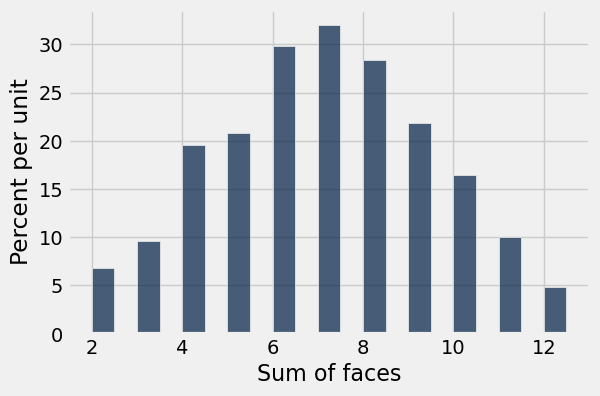

In [54]:
thousand_rolls = rollsickdice(1000)
t = Table().with_column('Sum of faces', thousand_rolls)

xrange = np.arange(2, 13, 0.5)
t.hist('Sum of faces', bins=xrange)


In [5]:
## simulating Year of the Snake scratchers ticket

prize_list = make_array(0, 2, 4, 8, 10, 18, 30, 88, 100, 888)
np.random.choice(prize_list, 6) 

# we don't know what weights were used, but this is an example 
weights = make_array(10, 10, 10, 10, 10, 5, 5, 2, 2, 1)
def scratch(n):
    num_wins = 0
    for i in np.arange(n):
        #ticket = np.random.choice(prize_list, 6, p=weights/sum(weights))
        ticket = np.random.choice(prize_list, 6)
        number_of_888 = np.count_nonzero(ticket == 888)
        if number_of_888 == 2:
            num_wins = num_wins + 1
    return num_wins
scratch(10000)

974

### Simulate a Game of Randomness

Suppose you are playing a game with your friend by rolling two standard dice. In each round, if the sum of face is more than 10, your friend pays you 8 dollars, otherwise, you pay her 1 dollar. Each game lasts 100 rounds. Simulate this game 1000 times and calculate the net winning for you at the end of the game.  

In [16]:
def dice_game(n):
    payout = 0
    outcomes = roll2dice(n)
    for i in outcomes:
        ...
        
    return(payout)

Simulate 1000 games, and plot the histogram of your net winning. What formula would describe the average net winning of this game? 

Calculate the proportion of games in which you have a positive winning (greater than $0)

### Simulating a scratchers ticket

California issues special scratcher lottery each year, and in 2025 (Year of the Snake), a special lottery was issued. When three or more of the same number appears on the ticket, you will win the prize corresponding to the number. The following code simulates the repeated generation of scratcher tickets and the likelihood that you will win the top prize ($888)

In [1]:

prize_list = make_array(0, 2, 4, 8, 10, 18, 30, 88, 100, 888)
np.random.choice(prize_list, 6) 

# we don't know what weights were used, but this is an example 
#weights = make_array(10, 10, 10, 10, 10, 5, 5, 2, 2, 1)
def scratch(n):
    num_wins = 0
    for i in np.arange(n):
#        ticket = np.random.choice(prize_list, 6, p=weights/sum(weights))
        ticket = np.random.choice(prize_list, 6)
        number_of_888 = np.count_nonzero(ticket == 888)
        if number_of_888 >= 3:
            num_wins = num_wins + 1
    return num_wins
scratch(10000)

NameError: name 'make_array' is not defined

Can you calculate the probability of winning $888 by using a formula? 